# Data walking through

In [218]:
import pandas as pd 
import numpy as np

# read csv and assign columns
columns = ["personId", "productId"]
df = pd.read_csv("dataset/ratebeer/wish.csv", header=None)
df.columns = columns

number_of_row = len(df)
# get number of products
number_of_product = len(np.unique(df["productId"]))
# get number of person
number_of_person = len(np.unique(df["personId"]))
df = df.groupby("personId").aggregate(lambda x: list(x))

In [219]:
print("Number of row:", number_of_row)
print("Number of person:", number_of_person)
print("Number of product:", number_of_product)
# first samples
df.head()

Number of row: 118453
Number of person: 1953
Number of product: 21654


,productId
personId,
39,"[47436, 1147, 64658, 9448, 12227, 10609, 6890,..."
63,"[36407, 53647, 36624]"
69,"[15017, 2491, 6924, 9193, 19633, 13730, 64975,..."
154,"[49774, 28173, 15017, 24350, 565, 22339, 17385..."
181,"[10524, 30591, 7183, 38426, 22537, 48679, 2912..."


In [220]:
# 'transactions' is now temporary variable
transactions = [row["productId"] for index, row in df.iterrows()]

In [221]:
from mlxtend.preprocessing import TransactionEncoder

transaction_encoder = TransactionEncoder()
wish_matrix = transaction_encoder.fit_transform(transactions).astype("int")
wish_df = pd.DataFrame(wish_matrix, columns=transaction_encoder.columns_)

# index is actually personId
wish_df.index = df.index 

In [222]:
wish_df.head()

,1,2,3,9,10,13,14,15,16,17,...,390987,391005,391163,391340,391802,392092,392165,392402,392478,393042
personId,,,,,,,,,,,,,,,,,,,,,
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
wish_count, freq = np.unique(wish_df.sum(axis=1), return_counts=True)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.scatter(wish_count, freq)

# Erase useless samples, which are so sparse 

In [237]:
new_df = wish_df.loc[wish_df.sum(axis=1) > 1]
new_df = new_df.loc[:, wish_df.sum() > 0]
print("Number of person having wish > 1:", len(new_df))


Number of person having wish > 1: 1840


In [225]:
print("Training dataset shape:", new_df.shape)
new_df.head()

Training dataset shape: (1840, 21654)


,1,2,3,9,10,13,14,15,16,17,...,390987,391005,391163,391340,391802,392092,392165,392402,392478,393042
personId,,,,,,,,,,,,,,,,,,,,,
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Re-stat 

In [249]:
wish_count, freq = np.unique(new_df.sum(axis=1), return_counts=True)

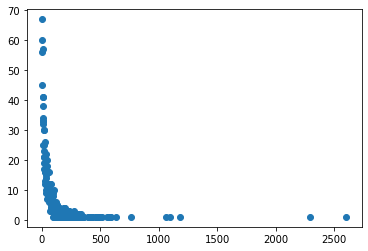

In [250]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.scatter(wish_count, freq)

# Transaction-based wish prediction using apriori

In [226]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(new_df, min_support=0.05)
rules = association_rules(frequent_itemsets, metric="lift")
# Something FAILED
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(776),(6441),0.111413,0.230978,0.051630,0.463415,2.006313,0.025896,1.433177
1,(6441),(776),0.230978,0.111413,0.051630,0.223529,2.006313,0.025896,1.144392
2,(5202),(1886),0.195109,0.129891,0.067935,0.348189,2.680621,0.042592,1.334910
3,(1886),(5202),0.129891,0.195109,0.067935,0.523013,2.680621,0.042592,1.687448
4,(6441),(2446),0.230978,0.129891,0.064130,0.277647,2.137534,0.034128,1.204548
...,...,...,...,...,...,...,...,...,...
173,(8766),(8324),0.113587,0.125000,0.053261,0.468900,3.751196,0.039062,1.647523
174,(15290),(14492),0.063587,0.107065,0.051630,0.811966,7.583843,0.044822,4.748790
175,(14492),(15290),0.107065,0.063587,0.051630,0.482234,7.583843,0.044822,1.808562
176,(15498),(14492),0.109783,0.107065,0.082065,0.747525,6.981957,0.070311,3.536722


In [227]:
len(rules)

178

In [228]:
print("Number of antecedents inferred:", len(np.unique(rules["antecedents"])))
print("Ratio of antecedents / well-known products:", len(np.unique(rules["antecedents"])) / number_of_product)

Number of antecedents inferred: 164
Ratio of antecedents / well-known products: 0.0075736584464764015


# User-based prediction using cosine similarity

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

X_train, X_test = train_test_split(new_df, test_size=1/3.0, random_state=1000)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1226
Test size: 614


In [230]:
sims = cosine_similarity(X_train.T, X_train.T)

In [231]:
sims.shape

(21654, 21654)

### Make a new df cotaining similarity and headers

In [167]:
sims_df = pd.DataFrame(sims)
sims_df.columns = new_df.columns
sims_df.index  = new_df.columns

In [168]:
sims_df

,1,2,3,9,10,13,14,15,16,17,...,390987,391005,391163,391340,391802,392092,392165,392402,392478,393042
1,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.000000,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.707107,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392092,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392165,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
392402,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392478,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
person_to_products = df.loc[new_df.index]

# Evaluation metrics: All but one

In [234]:
# precompute a set for quick query
valid_product_set = set(sims_df.index)

# evaluate all - but - one metrics:
# steps:
# 1: Assume that first valid one is unknown
# 2: Calculate prediction value for it
# 3: Verdict: +1 to score if pred > THREDSHOLD
score = 0

for _, sample in X_test.iterrows():
    ids = person_to_products.loc[sample.name]["productId"]
    test_product_id = -1
    for id in ids:
        if id in valid_product_set:
            test_product_id = id
            break
    # we never get the case where all are invalid !!!
    # assume that we didn't know that product is chosen
    dot_prod = np.dot(sample, sims_df.loc[test_product_id]) - 1
    sum_sims = sims_df.loc[test_product_id].sum() - 1 
    if sum_sims < 1e-6: 
        continue 
    pred = dot_prod / sum_sims
    score = score + (1 if pred > 0 else 0)

print("Accuracy: %.2f%%" % (score / len(X_test) * 100))

Accuracy: 93.00%


In [236]:

def give_recommendations(user_sample):
    result = []
    sample = [0] * len(wish_df.columns)
    user_product_set = set(user_sample)
    for product_id in user_sample:
        sample[product_id] = 1    
    for test_product_id in wish_df.columns:
        # skip known product
        if test_product_id in user_product_set:
            continue
        # sum(user_sample[i] * sim(test_product_id, i))
        dot_prod = np.dot(sample, sims_df.loc[test_product_id]) - 1
        # sum(sim(test_product_id, i))
        sum_sims = sims_df.loc[test_product_id].sum() - 1
        if sum_sims < 1e-6: 
            continue
        pred = dot_prod / sum_sims
        if pred > 0:
            result.append((test_product_id, pred))
    return result

import time
print("Start looking for recommendations ...")

marker = time.time()
recommendations = give_recommendations([15, 17])
print("Looking done in", time.time()-marker, " seconds")

print("Recommended products (id, prediction value) = ", recommendations)

Start looking for recommendations ...
Looking done in 60.204021692276
Recommended products (id, prediction value) =  []
